# Motorcycle Price Prediction

![Bike](https://cdn.bajajauto.com/-/media/assets/bajajauto/bikes/bikelisting/pulsar/pulsarns125.png)

## Data Exploration

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# import dataset
bike_dataset = pd.read_csv("/kaggle/input/motorcycle-dataset/BIKE DETAILS.csv")

In [3]:
# check first 5 rows
bike_dataset.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
# check last 5 rows
bike_dataset.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [5]:
# check number of rows and columns of dataset
bike_dataset.shape

(1061, 7)

In [6]:
# check product of number of rows and columns of dataset
bike_dataset.size

7427

In [7]:
# check the columns
bike_dataset.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [8]:
# check the information
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


## Data Cleaning

In [9]:
# check null values
bike_dataset.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [10]:
# drop all null values
bike_dataset.dropna(inplace=True)

In [11]:
# recheck null values
bike_dataset.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [12]:
# check duplicate rows
bike_dataset.duplicated().sum()

4

In [13]:
# drop duplicate rows
bike_dataset.drop_duplicates(inplace=True)

In [14]:
# recheck shape
bike_dataset.shape

(622, 7)

## Data Encoding

In [15]:
# check distribution of categorical data
print(bike_dataset.owner.value_counts())
print(bike_dataset.seller_type.value_counts())

owner
1st owner    552
2nd owner     66
3rd owner      3
4th owner      1
Name: count, dtype: int64
seller_type
Individual    619
Dealer          3
Name: count, dtype: int64


In [16]:
# encoding "Owner" Column
bike_dataset.replace({'owner':{'1st owner':0,'2nd owner':1,'3rd owner':2, '4th owner':3}},inplace=True)

# encoding "Seller_Type" Column
bike_dataset.replace({'seller_type':{'Dealer':0,'Individual':1}},inplace=True)

/tmp/ipykernel_18/3606033486.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bike_dataset.replace({'owner':{'1st owner':0,'2nd owner':1,'3rd owner':2, '4th owner':3}},inplace=True)
/tmp/ipykernel_18/3606033486.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bike_dataset.replace({'seller_type':{'Dealer':0,'Individual':1}},inplace=True)


## Linear Regression

In [17]:
# split data into X and Y
X = bike_dataset.drop(['name','selling_price'],axis=1)
Y = bike_dataset['selling_price']

In [18]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [19]:
# load linear regression model
lin_reg_model = LinearRegression()

In [20]:
# fit data into linear regression model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [21]:
# predict training data
training_data_prediction = lin_reg_model.predict(X_train)

In [22]:
# evaluate the model
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9002556977144476


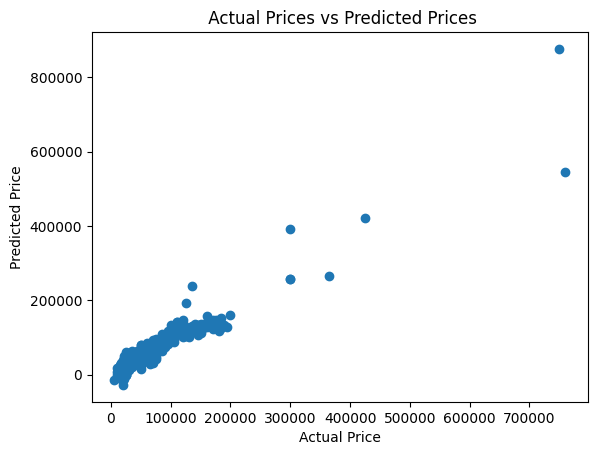

In [23]:
# plot actual vs predicted data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [24]:
# predict testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [25]:
# evaluate the model
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9105667477983609


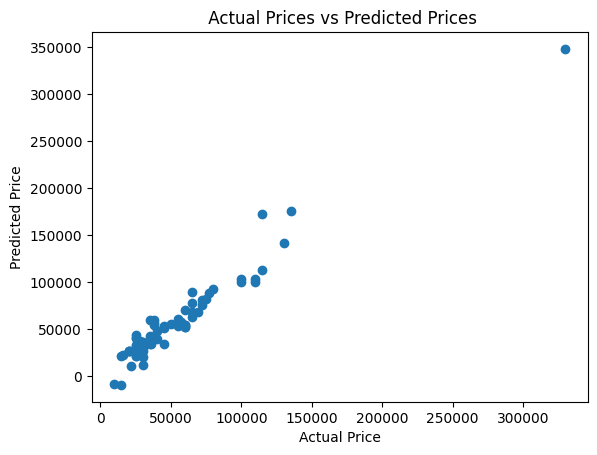

In [26]:
# plot actual vs predicted data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Lasso Regression

In [27]:
# load lasso regression model
lass_reg_model = Lasso()

In [28]:
# fit data into lasso regression model
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [29]:
# predict training data
training_data_prediction = lass_reg_model.predict(X_train)

In [30]:
# evaluate the model
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9002555470259558


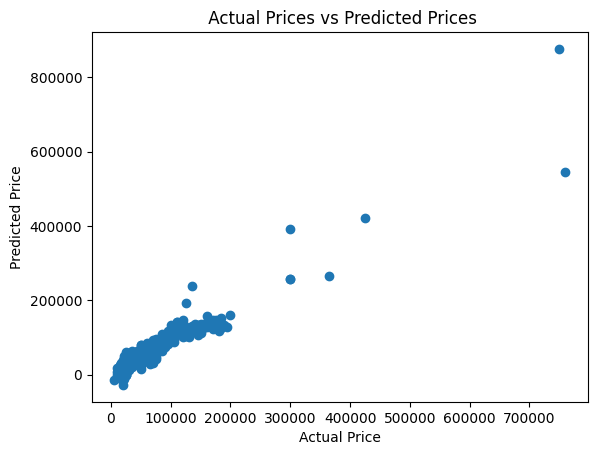

In [31]:
# plot actual vs predicted data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [32]:
# predict testing data
test_data_prediction = lass_reg_model.predict(X_test)

In [33]:
# evaluate the model
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9107277531434661


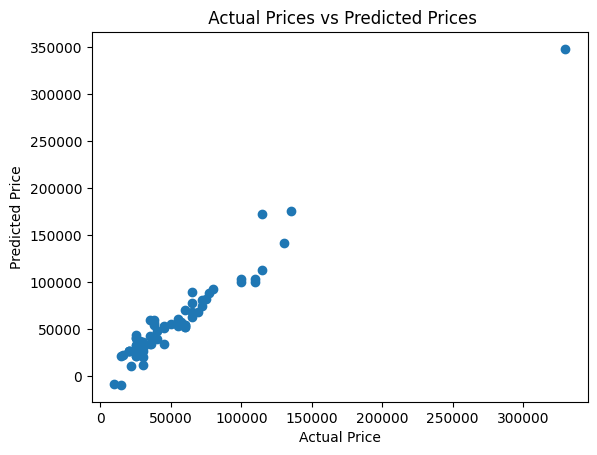

In [34]:
# plot the actual vs predicted model
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()